# WP12

## Theoretical Methods for Condensed Matter

### Tom Frömbgen

# Part I

## MD Simulations

### General Setup

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from inspect import signature
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution as DE

save_as_pgf = 0
save_as_png = 0

if save_as_pgf == 1:
    mpl.use("pgf")
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['pgf.texsystem'] = 'pdflatex'
    mpl.rcParams['pgf.rcfonts'] = False
    mpl.rcParams['pgf.preamble'] = r'\usepackage{amssymb} \usepackage{amsmath}'
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = 'Computer Modern'
    mpl.rc('axes', titlesize=10)     # fontsize of the axes title
    mpl.rc('axes', labelsize=10)     # fontsize of the x and y labels
    mpl.rc('xtick', labelsize=8)    # fontsize of the tick labels
    mpl.rc('ytick', labelsize=8)    # fontsize of the tick labels
    mpl.rc('legend', fontsize=8)
    mpl.rc('figure', titlesize=10)   # fontsize of the figure title

    lw = 1 # width of grid lines

    # width of tex document in inches
    fig_width = 6.69423
    fig_height = fig_width * 0.6
    import matplotlib.pyplot as plt
    
else:
    import matplotlib.pyplot as plt
    plt.rc('font', size=16)          # controls default text sizes
    plt.rc('axes', titlesize=16)     # fontsize of the axes title
    plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
    plt.rc('legend', fontsize=18)    # legend fontsize
    plt.rc('figure', titlesize=18)   # fontsize of the figure title

    lw = 1

    # height and width for nice print in jupyter notebook
    fig_width = 20
    fig_height = 10
    


# number of decimals printed in numpy stuff
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# uni bonn colors
blue = "#07529a"
yellow = "#ffb90c"

# number of decimals
ytick_format = mpl.ticker.FormatStrFormatter('%.2f')

### Helpers

In [2]:
def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")


def save_plot_as_png(fig, path):
  if save_as_png == 1:
    fig.savefig(path, format="png")


def checkForFaultyData(df):
  if df.isnull().sum().sum() != 0:
    df.dropna(how='any', inplace=True)
    print(df.isnull().sum())
    print("WARNING! Dropped some null values.")
  return df

## Main part

In [3]:
names = ["SPC/E", "SPC/Fw", "SPC-FQ"]
colors = ["k", "r", "b"]

## RDFs
### RDF(O-O) and RDF(O-H)

In [4]:
spce_oo = pd.read_csv("spce/travis/rdf/rdf_H2O_H2O_[Or_Oo].csv", delimiter=";")
spce_oh = pd.read_csv("spce/travis/rdf/rdf_H2O_H2O_[Or_Ho].csv", delimiter=";")

spcfw_oo = pd.read_csv("spcfw/travis/rdf/rdf_H2O_H2O_[Or_Oo].csv", delimiter=";")
spcfw_oh = pd.read_csv("spcfw/travis/rdf/rdf_H2O_H2O_[Or_Ho].csv", delimiter=";")

spcfq_oo = pd.read_csv("spcfq/travis/rdf/rdf_H2O_H2O_[Or_Oo].csv", delimiter=";")
spcfq_oh = pd.read_csv("spcfq/travis/rdf/rdf_H2O_H2O_[Or_Ho].csv", delimiter=";")

### Check for faulty data

In [5]:
spce_oo = checkForFaultyData(spce_oo)
spce_oh = checkForFaultyData(spce_oh)
spcfw_oo = checkForFaultyData(spcfw_oo)
spcfw_oh = checkForFaultyData(spcfw_oh)
spcfq_oo = checkForFaultyData(spcfq_oo)
spcfq_oh = checkForFaultyData(spcfq_oh)

oo = [spce_oo, spcfw_oo, spcfq_oo]
oh = [spce_oh, spcfw_oh, spcfq_oh]

### Plotting

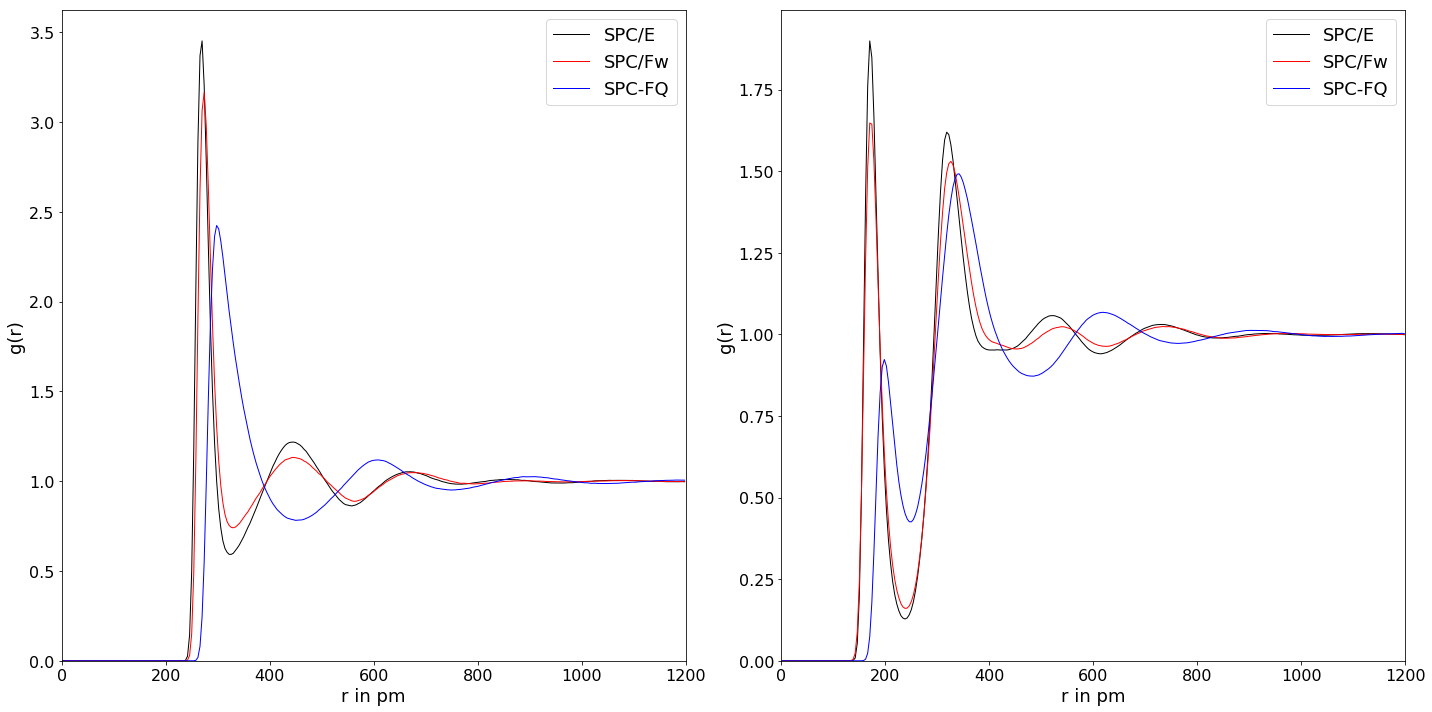

In [6]:
num_hor_plots = 2
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i in range(3):
  x = oo[i].iloc[:, 0]
  y = oo[i].iloc[:, 1]

  ax[0].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[0].set_xlim(0, 1200)
  ax[0].set_ylim(0)
  #ax[0].axhline(y=0, color="k", lw="0.3", ls="--")
  ax[0].set_ylabel(r"g(r)")
  ax[0].set_xlabel(r"r in pm")
  ax[0].legend(loc="best", fancybox=True)

  x = oh[i].iloc[:, 0]
  y = oh[i].iloc[:, 1]

  ax[1].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[1].set_xlim(0, 1200)
  ax[1].set_ylim(0)
  #ax[1].axhline(y=1, color="k", lw="0.3", ls="--")
  ax[1].set_ylabel(r"g(r)")
  ax[1].set_xlabel(r"r in pm")
  ax[1].legend(loc="best", fancybox=True)

fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/rdf.pgf")
plt.show()

## ADFs

In [7]:
spce = pd.read_csv("spce/travis/adf/adf_H2O_H2O_[Or_Hr]-[Or_Oo].csv", delimiter=";")
spcfw = pd.read_csv("spcfw/travis/adf/adf_H2O_H2O_[Or_Hr]-[Or_Oo].csv", delimiter=";")
spcfq = pd.read_csv("spcfq/travis/adf/adf_H2O_H2O_[Or_Hr]-[Or_Oo].csv", delimiter=";")

### Check for faulty data

In [8]:
spce = checkForFaultyData(spce)
spcfw = checkForFaultyData(spcfw)
spcfq = checkForFaultyData(spcfq)

data = [spce, spcfw, spcfq]

### Plotting

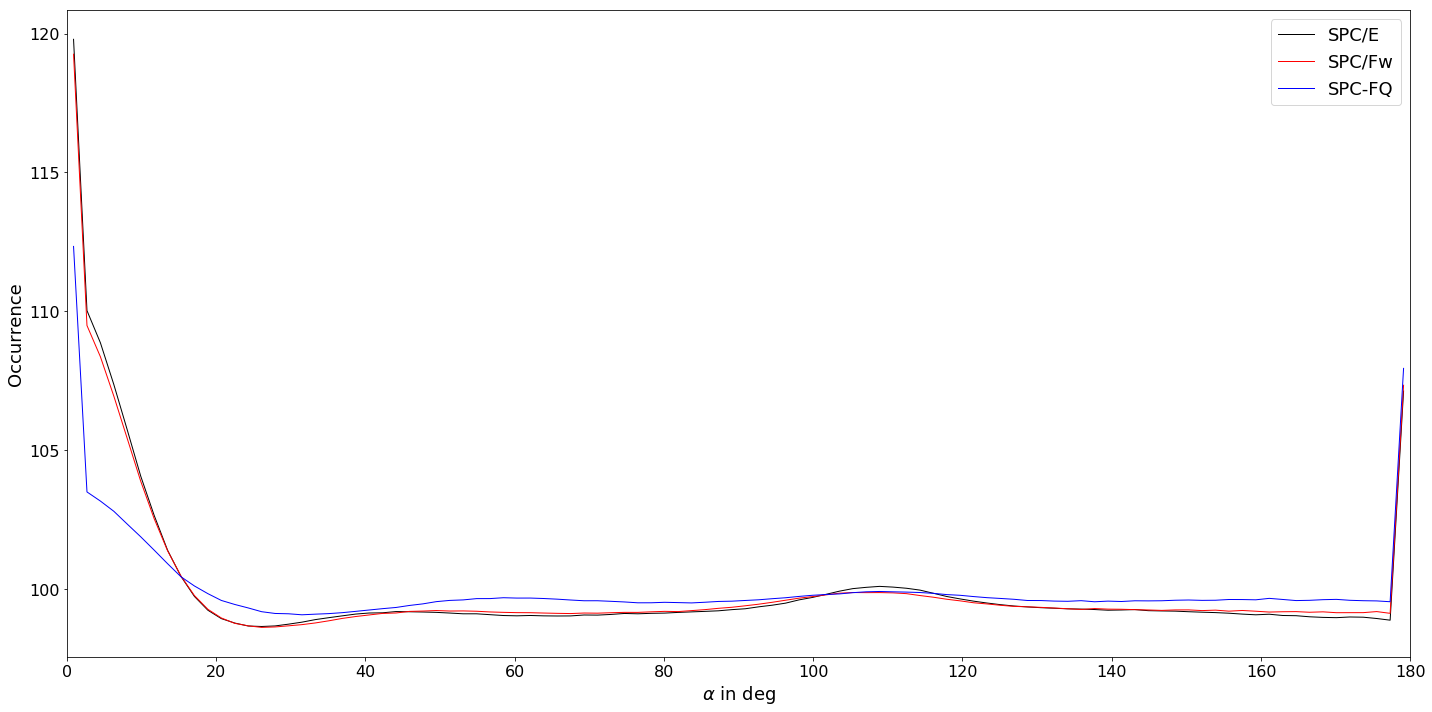

In [9]:
num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i, model in enumerate(data):
  x = model.iloc[:, 0]
  y = model.iloc[:, 1]

  ax.plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax.set_xlim(0, 180)
  #ax.set_ylim(0, 120)
  ax.set_ylabel("Occurrence")
  ax.set_xlabel(r"$\alpha$ in deg")
  ax.legend(loc="best", fancybox=True)


fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/adf.pgf")
plt.show()

## AGGR
### continous and intermittent

In [10]:
spce_cont = pd.read_csv("spce/travis/aggr_continuous/dacf_H2O_H2O_r0-326_a0-30_cont.csv", delimiter=";")
spcfw_cont = pd.read_csv("spcfw/travis/aggr_continuous/dacf_H2O_H2O_r0-330_a0-30_cont.csv", delimiter=";")
spcfq_cont = pd.read_csv("spcfq/travis/aggr_continuous/dacf_H2O_H2O_r0-450_a0-30_cont.csv", delimiter=";")

spce_inter = pd.read_csv("spce/travis/aggr_intermittent/dacf_H2O_H2O_r0-326_a0-30_int_correq.csv", delimiter=";")
spcfw_inter = pd.read_csv("spcfw/travis/aggr_intermittent/dacf_H2O_H2O_r0-330_a0-30_int_correq.csv", delimiter=";")
spcfq_inter = pd.read_csv("spcfq/travis/aggr_intermittent/dacf_H2O_H2O_r0-450_a0-30_int_correq.csv", delimiter=";")

### Check for faulty data

In [11]:
spce_cont = checkForFaultyData(spce_cont)
spcfw_cont = checkForFaultyData(spcfw_cont)
spcfq_cont = checkForFaultyData(spcfq_cont)


spce_inter = checkForFaultyData(spce_inter)
spcfw_inter = checkForFaultyData(spcfw_inter)
spcfq_inter = checkForFaultyData(spcfq_inter)

cont = [spce_cont, spcfw_cont, spcfq_cont]
inter = [spce_inter, spcfw_inter, spcfq_inter]

### Plotting

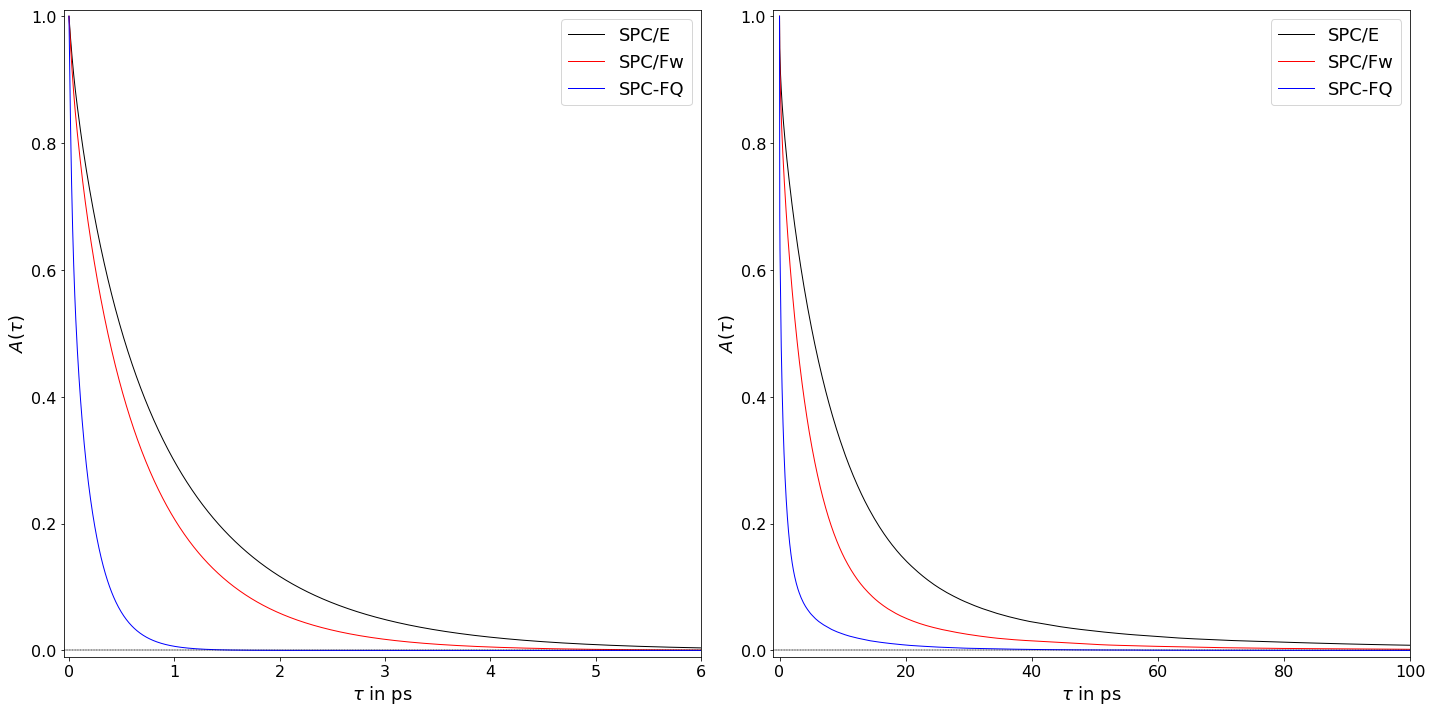

In [12]:
num_hor_plots = 2
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i in range(3):
  x = cont[i].iloc[:, 0]
  y = cont[i].iloc[:, 1]

  ax[0].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[0].set_xlim(-0.05, 6)
  ax[0].set_ylim(-0.01, 1.01)
  ax[0].axhline(y=0, color="k", lw="0.3", ls="--")
  #ax[0].set_title("continuous")
  ax[0].set_ylabel(r"$A(\tau)$")
  ax[0].set_xlabel(r"$\tau$ in ps")
  ax[0].legend(loc="best", fancybox=True)

  x = inter[i].iloc[:, 0]
  y = inter[i].iloc[:, 1]

  ax[1].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[1].set_xlim(-1, 100)
  ax[1].set_ylim(-0.01, 1.01)
  ax[1].axhline(y=0, color="k", lw="0.3", ls="--")
  #ax[1].set_title("intermittent")
  ax[1].set_ylabel(r"$A(\tau)$")
  ax[1].set_xlabel(r"$\tau$ in ps")
  ax[1].legend(loc="best", fancybox=True)

fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/aggr.pgf")
plt.show()

## MSD

In [13]:
spce = pd.read_csv("spce/travis/msd/msd_H2O_O.csv", delimiter=";")
spcfw = pd.read_csv("spcfw/travis/msd/msd_H2O_O.csv", delimiter=";")
spcfq = pd.read_csv("spcfq/travis/msd/msd_H2O_O.csv", delimiter=";")

### Check for faulty data

In [14]:
spce = checkForFaultyData(spce)
spcfw = checkForFaultyData(spcfw)
spcfq = checkForFaultyData(spcfq)

data = [spce, spcfw, spcfq]

### Plotting

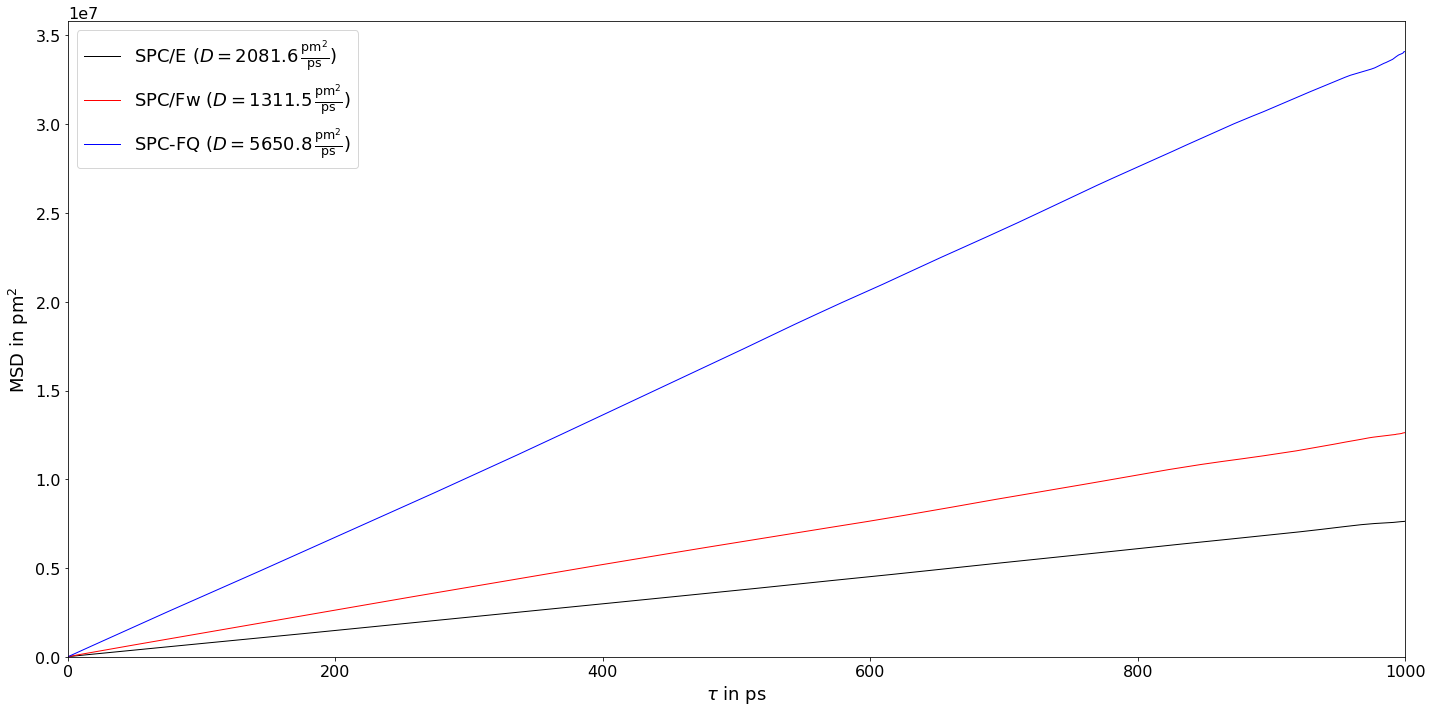

In [15]:
D = [2081.61, 1311.49, 5650.80]

num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i, model in enumerate(data):
  x = model.iloc[:, 0]
  y = model.iloc[:, 1]

  label = r"{} $(D={}\,\frac{{\mathrm{{pm}}^{{2}}}}{{\mathrm{{ps}}}})$".format(names[i], round(D[i], 1))
  ax.plot(x, y, color=colors[i], ls="-", lw=lw, label=label)

ax.set_xlim(0, 1000)
ax.set_ylim(bottom=0)
ax.set_ylabel(r"MSD in $\mathrm{pm}^{2}$")
ax.set_xlabel(r"$\tau$ in ps")
ax.legend(loc="best", fancybox=True)


fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/msd.pgf")
plt.show()


## ACF

In [16]:
spce = pd.read_csv("spce/travis/acf/vacf_[H2O_O].csv", delimiter=";")
spcfw = pd.read_csv("spcfw/travis/acf/vacf_[H2O_O].csv", delimiter=";")
spcfq = pd.read_csv("spcfq/travis/acf/vacf_[H2O_O].csv", delimiter=";")

### Check for faulty data

In [17]:
spce = checkForFaultyData(spce)
spcfw = checkForFaultyData(spcfw)
spcfq = checkForFaultyData(spcfq)

data = [spce, spcfw, spcfq]

### Plotting

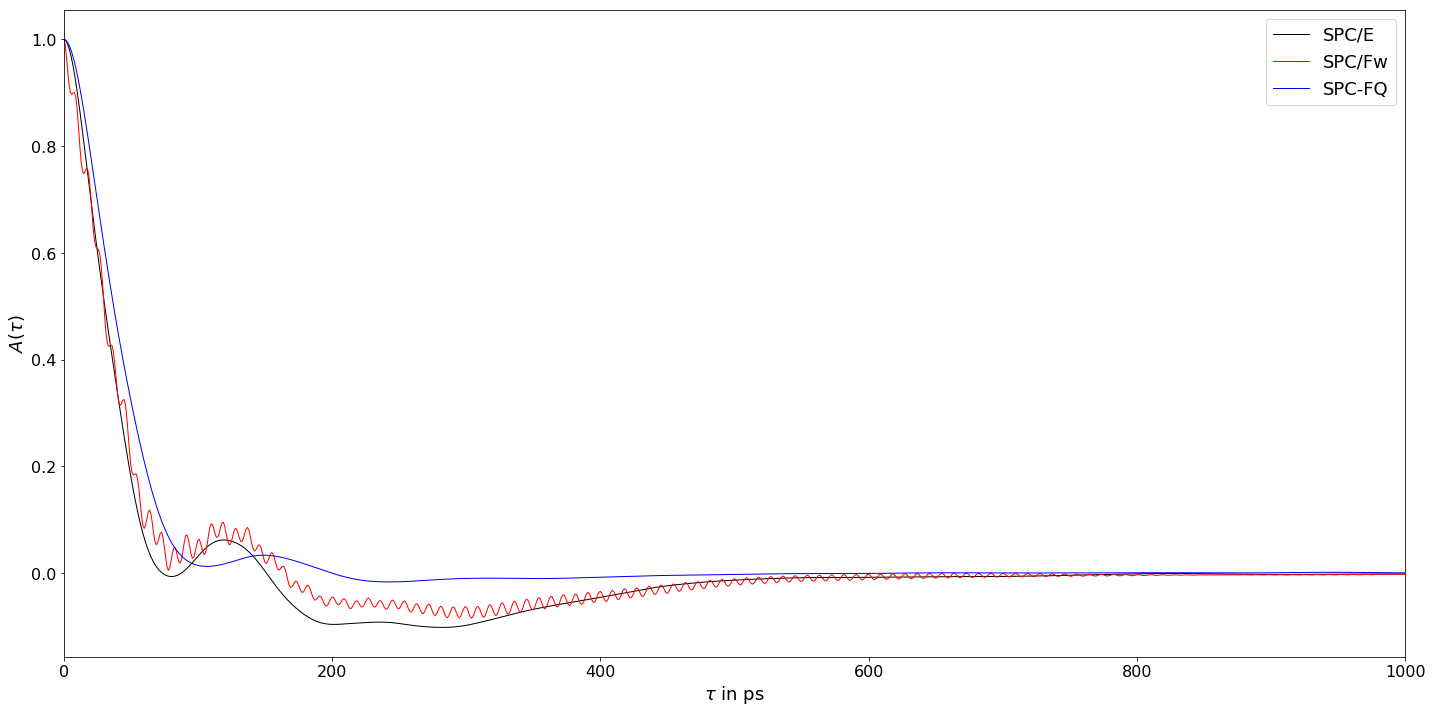

In [18]:
num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i, model in enumerate(data):
  x = model.iloc[:, 0]
  y = model.iloc[:, 1]/max(model.iloc[:, 1])

  ax.plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])

ax.set_xlim(0, 1000)
#ax.set_ylim(-50000,500000)
ax.set_ylabel(r"$A(\tau)$")
ax.set_xlabel(r"$\tau$ in ps")
ax.legend(loc="best", fancybox=True)


fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/vacf.pgf")
plt.show()

## POWER
### O-atoms and global

In [19]:
spce_o = pd.read_csv('spce/travis/power/power_spectrum_[H2O_O].csv', delimiter=";")
spcfw_o = pd.read_csv('spcfw/travis/power/power_spectrum_[H2O_O].csv', delimiter=";")
spcfq_o = pd.read_csv('spcfq/travis/power/power_spectrum_[H2O_O].csv', delimiter=";")

spce_g = pd.read_csv('spce/travis/power/power_spectrum_global.csv', delimiter=";")
spcfw_g = pd.read_csv('spcfw/travis/power/power_spectrum_global.csv', delimiter=";")
spcfq_g = pd.read_csv('spcfq/travis/power/power_spectrum_global.csv', delimiter=";")

### Check for faulty data

In [20]:
spce_o = checkForFaultyData(spce_o)
spcfw_o = checkForFaultyData(spcfw_o)
spcfq_o = checkForFaultyData(spcfq_o)

spce_g = checkForFaultyData(spce_g)
spcfw_g = checkForFaultyData(spcfw_g)
spcfq_g = checkForFaultyData(spcfq_g)


oxygen = [spce_o, spcfw_o, spcfq_o]
glob = [spce_g, spcfw_g, spcfq_g]

### Plotting

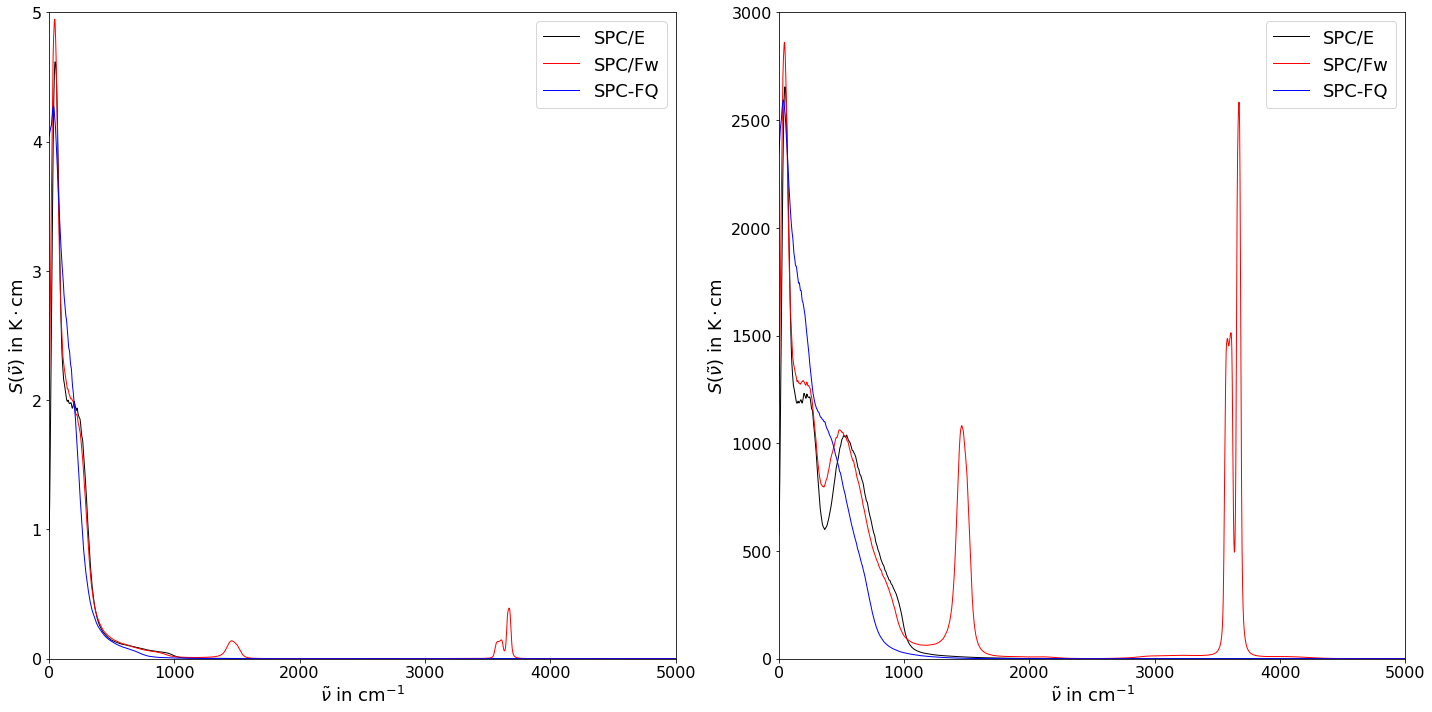

In [21]:
num_hor_plots = 2
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

for i in range(3):
  x = oxygen[i].iloc[:, 0]
  y = oxygen[i].iloc[:, 1]

  ax[0].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[0].set_xlim(0, 5000)
  ax[0].set_ylim(0,5)
  #ax[0].set_title("Oxygen")
  ax[0].set_ylabel(r"$S(\tilde{\nu})$ in $\mathrm{K}\cdot \mathrm{cm}$")
  ax[0].set_xlabel(r"$\tilde{\nu}$ in $\mathrm{cm}^{-1}$")
  ax[0].legend(loc="best", fancybox=True)

  x = glob[i].iloc[:, 0]
  y = glob[i].iloc[:, 1]

  ax[1].plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])
  ax[1].set_xlim(0, 5000)
  ax[1].set_ylim(0,3000)
  #ax[1].set_title("Global")
  #ax[1].axhline(y=0, color="k", lw="0.3", ls="--")
  ax[1].set_ylabel(r"$S(\tilde{\nu})$ in $\mathrm{K}\cdot \mathrm{cm}$")
  ax[1].set_xlabel(r"$\tilde{\nu}$ in $\mathrm{cm}^{-1}$")
  ax[1].legend(loc="best", fancybox=True)

fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/power.pgf")
plt.show()

## RDYN

In [22]:
spce = pd.read_csv("spce/travis/rdyn/rdyn_[dip_H2O].csv", delimiter=";")
spcfw = pd.read_csv("spcfw/travis/rdyn/rdyn_[dip_H2O].csv", delimiter=";")

### Check for faulty data

In [23]:
spce = checkForFaultyData(spce)
spcfw = checkForFaultyData(spcfw)

data = [spce, spcfw]

### Fit

In [24]:
def fit(t, a1, tau1, a2, tau2):
  return a1 * np.exp(-t / tau1) + a2 * np.exp(-t / tau2)


def generateInitialParameters(fit, xData, yData, num_params=4):
  # min and max used for bounds
  maxX = max(xData)
  minX = min(xData)

  parameterBounds = []
  for i in range(len(signature(fit).parameters) - 1):
    parameterBounds.append([minX, maxX])  # search bounds

  def sumOfSquaredError(parameterTuple):
    '''function for genetic algorithm to minimize (sum of squared error)'''
    # warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = fit(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)

  # "seed" the numpy random number generator for repeatable results
  result = DE(sumOfSquaredError, parameterBounds, seed=3)
  return result.x


def Rsquared(y, yModel):
  absError = yModel - y
  Rsq = 1.0 - (np.var(absError) / np.var(y))
  return Rsq*100



### Plotting

R² for SPC/E: 99.93%
tau_reor SPC/E = 9.53 ps

R² for SPC/Fw: 99.98%
tau_reor SPC/Fw = 5.3 ps


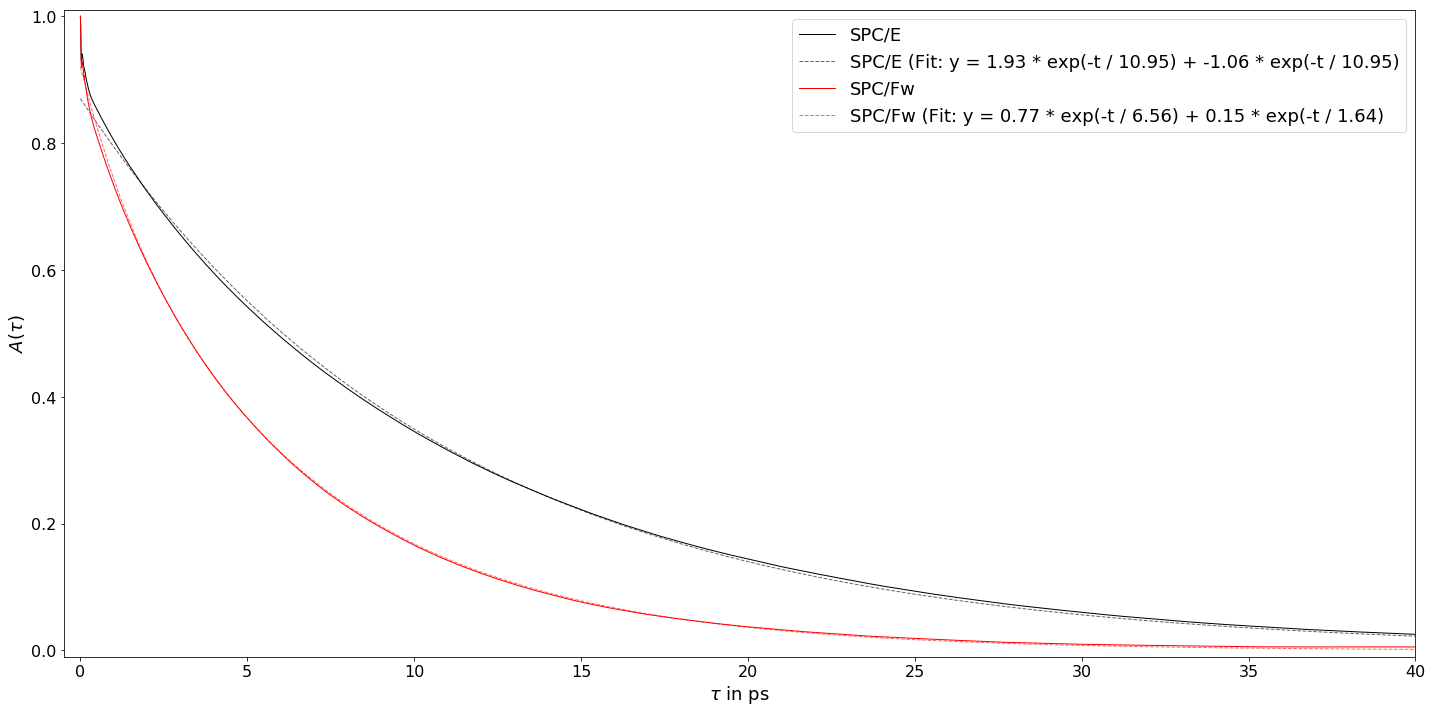

In [25]:
num_hor_plots = 1
num_vert_plots = 1
fig, ax = plt.subplots(num_vert_plots, num_hor_plots, figsize=(
    fig_width, fig_height))

xlim_max = 40
vals = np.linspace(0, xlim_max, 100)

for i, model in enumerate(data):
  x = model.iloc[:30000, 0]
  y = model.iloc[:30000, 1]
  #print(x)
  ax.plot(x, y, color=colors[i], ls="-", lw=lw, label=names[i])

  # first 2000 vals and from 2000 to 20000 only every second
  #x_reduced = np.array(x.to_list()[0:2000] + x.to_list()[2000:20000][0::2])
  #y_reduced = np.array(y.to_list()[0:2000] + y.to_list()[2000:20000][0::2])
  
  parameters = generateInitialParameters(fit, x, y)
  popt, pcov = curve_fit(fit, x, y)
  yModel = fit(x, *popt)
  R2 = Rsquared(y, yModel)

  popt = np.around(popt, 2)
  label = f"{names[i]} (Fit: y = {popt[0]} * exp(-t / {popt[1]}) + {popt[2]} * exp(-t / {popt[3]})"
  ax.plot(vals, fit(vals, *popt), color=colors[i], ls="--", lw=lw, alpha=0.6, label=label)

  #print(f"For efficieny reasons, the fit only comprises {len(x)}/{len(x)} values.")
  print(f"R² for {names[i]}: {round(R2, 2)}%")
  print(f"tau_reor {names[i]} = {round(popt[0]*popt[1]+popt[2]*popt[3], 2)} ps")
  
  # separation line
  if i == 0:
    print("")


ax.set_xlim(-0.5, xlim_max)
ax.set_ylim(-0.01, 1.01)
ax.set_ylabel(r"$A(\tau)$")
ax.set_xlabel(r"$\tau$ in ps")
ax.legend(loc="best", fancybox=True)


fig.tight_layout()
save_plot_as_pgf(fig, "protocol/Graphen/rdyn.pgf")
plt.show()

